In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/kaggle/input/sf-crime/train.csv.zip', parse_dates=['Dates'])
test_df = pd.read_csv('/kaggle/input/sf-crime/train.csv.zip', parse_dates=['Dates'])

In [3]:
train_df.sample(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
576046,2007-03-22 05:30:00,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,CENTRAL,"ARREST, BOOKED",BUSH ST / MASON ST,-122.410437,37.789950
553017,2007-07-25 13:00:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,CENTRAL,UNFOUNDED,1600 Block of THE EMBARCADERONORTH ST,-122.410774,37.808435
330212,2010-10-20 08:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,TARAVAL,NONE,3200 Block of 20TH AV,-122.475647,37.728528
796159,2004-02-06 21:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,BAYVIEW,"ARREST, CITED",HOLLISTER AV / INGALLS ST,-122.392421,37.719741
767937,2004-06-22 22:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,FILLMORE ST / FELL ST,-122.431014,37.774902


In [4]:
test_df.sample(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
125659,2013-09-07 23:00:00,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Saturday,PARK,"ARREST, BOOKED",1700 Block of MCALLISTER ST,-122.44088,37.777532


In [5]:
print('Number of Categories: ', train_df.Category.nunique())
print('Number of PdDistricts: ', train_df.PdDistrict.nunique())
print('Number of DayOfWeeks: ', train_df.DayOfWeek.nunique())
print('_________________________________________________')
# Show some useful Information
train_df.info()

Number of Categories:  39
Number of PdDistricts:  10
Number of DayOfWeeks:  7
_________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [6]:
train_df = train_df.drop('Resolution', axis=1)
train_df.sample(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
306571,2011-02-23 20:47:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Wednesday,MISSION,1200 Block of POTRERO AV,-122.406208,37.752357


In [7]:
train_df.drop_duplicates(inplace=True)
train_df.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
test_df.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
train_df.dropna(inplace=True)

In [8]:
train_df['Date'] = pd.to_datetime(train_df.Dates)
test_df['Date'] = pd.to_datetime(test_df.Dates)

train_df = train_df.drop('Dates', axis=1)
test_df = test_df.drop('Dates', axis=1)
train_df.sample(1)

,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Date
864462,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Friday,TARAVAL,SLOAT BL / JUNIPERO SERRA BL,-122.471569,37.734705,2003-03-07 07:45:00


In [9]:
# Confirm that it was parsed to Datetime
train_df.Date.dtype

dtype('<M8[ns]')

In [10]:
train_df['IsDay'] = 0
train_df.loc[ (train_df.Date.dt.hour > 6) & (train_df.Date.dt.hour < 20), 'IsDay' ] = 1
test_df['IsDay'] = 0
test_df.loc[ (test_df.Date.dt.hour > 6) & (test_df.Date.dt.hour < 20), 'IsDay' ] = 1

train_df.sample(3)

,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Date,IsDay
306272,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,CENTRAL,1300 Block of BATTERY ST,-122.402005,37.803687,2011-02-24 19:15:00,1
119556,RUNAWAY,RUNAWAY,Saturday,TARAVAL,0 Block of FARALLONES ST,-122.454154,37.714035,2013-10-05 10:45:00,1
293318,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,CENTRAL,PINE ST / MONTGOMERY ST,-122.402574,37.791898,2011-05-06 14:00:00,1


In [11]:
days_to_int_dic = {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7,
}
train_df['DayOfWeek'] = train_df['DayOfWeek'].map(days_to_int_dic)
test_df ['DayOfWeek'] = test_df ['DayOfWeek'].map(days_to_int_dic)

train_df.DayOfWeek.unique()

array([3, 2, 1, 7, 6, 5, 4])

In [12]:
train_df['Hour'] = train_df.Date.dt.hour
train_df['Month'] = train_df.Date.dt.month
train_df['Year'] = train_df.Date.dt.year
train_df['Year'] = train_df['Year'] - 2000 

test_df['Hour'] = test_df.Date.dt.hour
test_df['Month'] = test_df.Date.dt.month
test_df['Year'] = test_df.Date.dt.year
test_df['Year'] = test_df['Year'] - 2000

train_df.sample(1)

,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Date,IsDay,Hour,Month,Year
493016,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,6,SOUTHERN,MARKET ST / JONES ST,-122.411979,37.780904,2008-05-31 20:33:00,0,20,5,8


In [13]:
train_df = pd.get_dummies(train_df, columns=['PdDistrict'])
test_df  = pd.get_dummies(test_df,  columns=['PdDistrict'])
train_df.sample(2)

,Category,Descript,DayOfWeek,Address,X,Y,Date,IsDay,Hour,Month,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
656355,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,1,CLEMENT ST / 22ND AV,-122.481662,37.782160,2006-01-23 17:26:00,1,17,1,...,0,0,0,0,0,0,1,0,0,0
720024,VEHICLE THEFT,STOLEN AUTOMOBILE,7,CONNECTICUT ST / CESAR CHAVEZ ST,-122.396278,37.749747,2005-02-27 08:00:00,1,8,2,...,1,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# train_df['CategoryInt'] = pd.Series(le.fit_transform(train_df.Category))
train_df['CategoryInt'] = le.fit_transform(train_df.Category)
train_df.sample(5)
#le.classes_

,Category,Descript,DayOfWeek,Address,X,Y,Date,IsDay,Hour,Month,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt
711952,NON-CRIMINAL,LOST PROPERTY,6,0 Block of HEYMAN ST,-122.420283,37.741963,2005-04-09 21:00:00,0,21,4,...,0,1,0,0,0,0,0,0,0,20
392448,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",1,500 Block of SOUTH VAN NESS AV,-122.417477,37.764358,2009-11-09 01:13:00,0,1,11,...,0,0,1,0,0,0,0,0,0,20
473873,TRESPASS,TRESPASSING,7,0 Block of LEAVENWORTH ST,-122.413844,37.781410,2008-09-07 08:30:00,1,8,9,...,0,0,0,0,0,0,0,0,1,34
243088,RECOVERED VEHICLE,RECOVERED VEHICLE - STOLEN OUTSIDE SF,2,3100 Block of SAN JOSE AV,-122.457903,37.709234,2012-02-07 17:00:00,1,17,2,...,0,0,0,0,0,0,0,1,0,24
254971,ROBBERY,"ROBBERY, BODILY FORCE",6,19TH AV / BUCKINGHAM WY,-122.474961,37.725690,2011-12-03 10:30:00,1,10,12,...,0,0,0,0,0,0,0,1,0,25


In [15]:
train_df['CategoryInt'].sample(10)

717805     1
70795     20
788451    21
611171    19
370106    16
280192    16
183258    38
282282    28
796479    20
188904    16
Name: CategoryInt, dtype: int64

In [16]:
train_df['InIntersection'] = 1
train_df.loc[train_df.Address.str.contains('Block'), 'InIntersection'] = 0

test_df['InIntersection'] = 1
test_df.loc[test_df.Address.str.contains('Block'), 'InIntersection'] = 0

In [17]:
train_df.sample(2)

,Category,Descript,DayOfWeek,Address,X,Y,Date,IsDay,Hour,Month,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt,InIntersection
600037,MISSING PERSON,MISSING JUVENILE,7,0 Block of PATTON ST,-122.423139,37.737901,2006-11-05 17:00:00,1,17,11,...,1,0,0,0,0,0,0,0,19,0
37745,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,3,1200 Block of GIRARD ST,-122.400430,37.717146,2014-11-12 06:05:00,0,6,11,...,1,0,0,0,0,0,0,0,32,0


In [18]:
train_df.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Address', 'X', 'Y', 'Date',
       'IsDay', 'Hour', 'Month', 'Year', 'PdDistrict_BAYVIEW',
       'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION',
       'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND',
       'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN',
       'CategoryInt', 'InIntersection'],
      dtype='object')

In [19]:
feature_cols = ['X', 'Y', 'IsDay', 'DayOfWeek', 'Month', 'Hour', 'Year', 'InIntersection',
                'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
                'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
                'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
target_col = 'CategoryInt'

train_x = train_df[feature_cols]
train_y = train_df[target_col]

from sklearn.model_selection import train_test_split
X_train, X_test, f_train, f_test = train_test_split(train_x, train_y, test_size=0.3)
# test_x = test_df[feature_cols]
test_ids = X_test.index.values

In [20]:
train_y

0         37
1         21
2         21
3         16
4         16
          ..
878044    25
878045    16
878046    16
878047    35
878048    12
Name: CategoryInt, Length: 875363, dtype: int64

In [21]:
test_ids

array([ 79179, 596806, 610086, ..., 441107, 168308, 164721])

In [22]:
print(train_df.shape)
print(train_y.shape)

(875363, 23)
(875363,)


In [23]:
# test_df.sample(1)

In [24]:
import xgboost as xgb
train_xgb = xgb.DMatrix(X_train, label=f_train)
test_xgb  = xgb.DMatrix(X_test)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [25]:
params = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 39,
}

In [26]:
CROSS_VAL = False
if CROSS_VAL:
    print('Doing Cross-validation ...')
    cv = xgb.cv(params, train_xgb, nfold=3, early_stopping_rounds=10, metrics='mlogloss', verbose_eval=True)
    cv

In [27]:
from sklearn.metrics import log_loss

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, f_train)
pred_result=neigh.predict(X_test)
from sklearn.metrics import accuracy_score   #accuracy
accuracy = accuracy_score(f_test,pred_result)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 18.37%


In [29]:
pred_result_proba=neigh.predict_proba(X_test)

In [34]:
from sklearn.metrics import log_loss
score = log_loss(f_test, pred_result_proba)
print("LogLoss:",score)

LogLoss: 21.817373683117427


In [42]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(f_test, pred_result, pos_label=2)

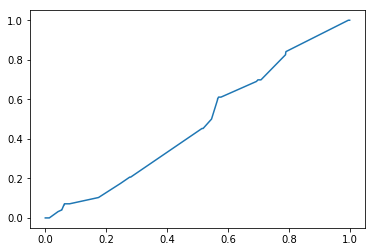

AUC: 0.47898569878660013


In [43]:
plt.plot(fpr,tpr)
plt.show()
AUC = metrics.auc(fpr, tpr)
print("AUC:",AUC)

In [48]:
recall=metrics.recall_score(f_test, pred_result, pos_label=2,average=None)
print("recall score:",recall)

recall score: [0.03820225 0.32250369 0.00793651 0.         0.15562824 0.06912096
 0.03021583 0.41052826 0.01908397 0.01257862 0.         0.02547771
 0.08981657 0.06169213 0.02777778 0.03138374 0.34261524 0.03697479
 0.08659218 0.16933761 0.10053912 0.16294388 0.         0.36032028
 0.0043956  0.02076677 0.00175131 0.00168634 0.03196347 0.
 0.00073099 0.00684932 0.01139962 0.         0.00686185 0.02310035
 0.10771343 0.0213908  0.02732448]


(39,)